# Árboles de decisión: Clasificación

In [1]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.tree import export_graphviz
from graphviz import Source 

## Clasificación

Predeciremos si un pagaré de banco es auténtico o falso dependiendo de los cuatro atributos diferentes de la imagen de la nota. Los atributos son la varianza de la imagen transformada en ondas, la curtosis de la imagen, la entropía y el sesgo de la imagen.

In [2]:
#importar archivo
dataset = pd.read_csv( "bill_authentication.csv",sep=',')

Para obtener información más detallada sobre este conjunto de datos, consulte el repositorio de UCI ML para este conjunto de datos. https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [3]:
dataset.shape

(1372, 5)

In [4]:
dataset.head(n=3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [5]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class'] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)  

In [7]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
y_pred = classifier.predict(X_test)


In [9]:
pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicción'])

Predicción,0,1
Actual,,
0,227,3
1,2,180


In [10]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[227   3]
 [  2 180]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       230
          1       0.98      0.99      0.99       182

avg / total       0.99      0.99      0.99       412



## Visualización del árbol

In [11]:

colnames=X.columns.values.tolist()
predictors=colnames
predictors

['Variance', 'Skewness', 'Curtosis', 'Entropy']

In [12]:
with open ('segundo_tree.dot', "w") as dotfile:
    export_graphviz(classifier, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [13]:
file=open('segundo_tree.dot', "r")
text=file.read()

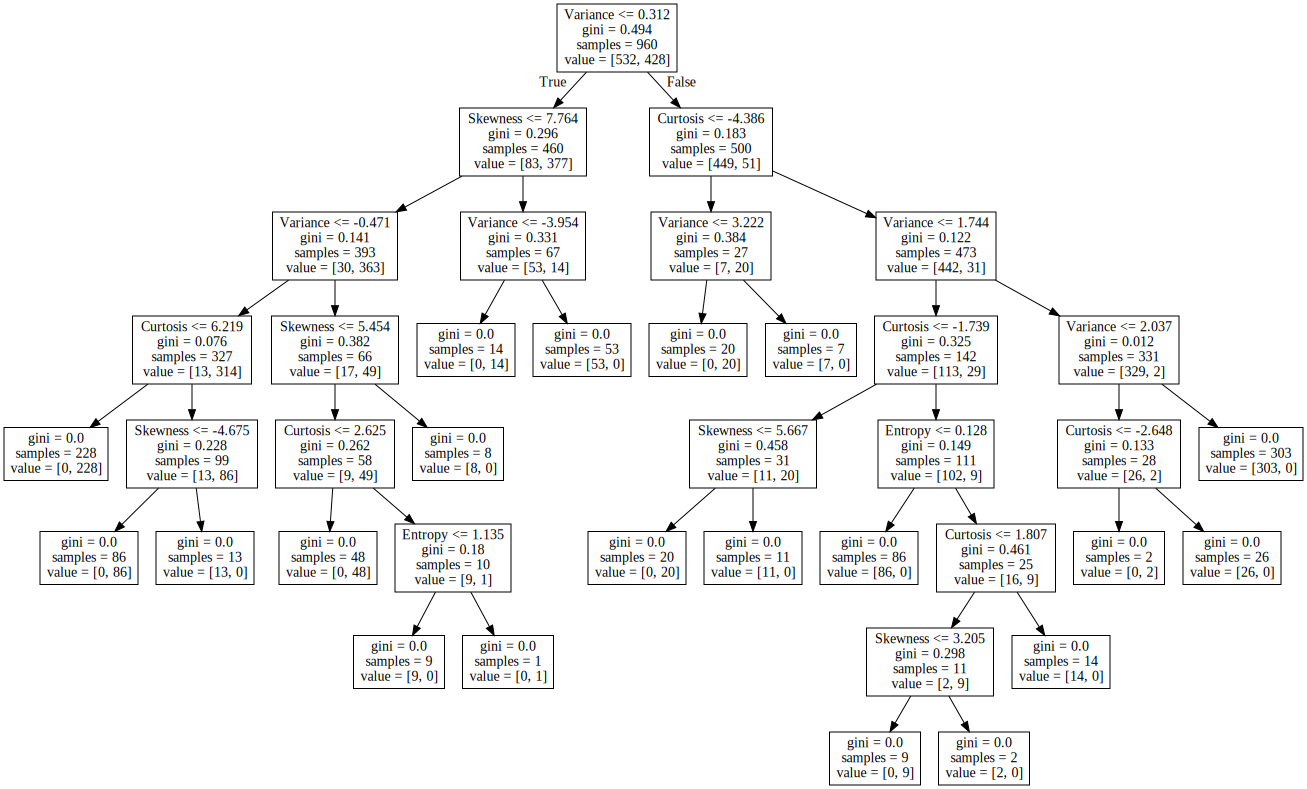

In [14]:
Source(text)